<h1> Hidden Markov Models </h1>
<p> A hidden markov model is based on the idea of a Markov chain. From Wikipedia: "A Hidden Markov Model (HMM) is a statistical Markov model in which the system being modeled is assumed to be a Markov process — call it $X$ - with unobservable ("hidden") states. As part of the definition, HMM requires that there be an observable process $Y$ whose outcomes are "influenced" by the outcomes of $X$ in a known way. Since $X$ cannot be observed directly, the goal is to learn about $X$ by observing $Y$." </p>
<p> Markov models deal with states, and probability distributions over those states. Transitions between the states are known as transition probabilities. </p>

<h2> Weather Model </h2>
<p>(Taken directly from the TensorFlow documentation)</p>
<p> Model a simple weather system and try to predict the temperature on a given day using the following information: </p>
<ul>
    <li>Cold days are encoded by 0 and hot days are encoded by 1.</li>
    <li>The first day has an 80% chance of being cold.</li>
    <li>A cold day has a 30% chance of being followed by a hot day.</li>
    <li>A hot day has a 20% chance of being followed by a cold day.</li>
    <li>On each day the temperature is normally distributed with $\text{mean}=0$ and $\text{stddev}=5$ on a cold day, and $\text{mean}=15$ and $\text{stddev}=10$ on a hot day.</li>
</ul>

In [17]:
!pip install -q tensorflow_probability
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [18]:
#define the distributions
tfd = tfp.distributions
initial_distribution = tfd.Categorical(probs=[0.8,0.2])
transition_distribution = tfd.Categorical(probs=[[0.7, 0.3],
                                                 [0.2, 0.8]])
#loc is mean, scale is stddev
observation_distribution = tfd.Normal(loc=[0.,15.],
                                     scale=[5.,10.])

In [19]:
#make the model
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=10
)

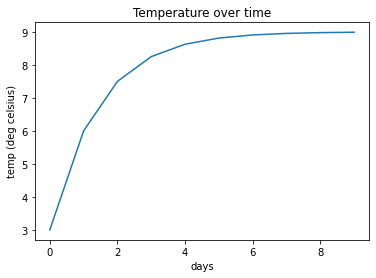

In [20]:
#get expected temperatures on each day
mean = model.mean()

#grab the value by running a session
with tf.compat.v1.Session() as sess:
    temps = mean.numpy()
    plt.plot(temps)
    plt.xlabel("days")
    plt.ylabel("temp (deg celsius)")
    plt.title("Temperature over time")

<p> Expected temperature gets hotter over time, which makes sense as the transition from cold to hot is more likely than the reverse. </p>